# School Matcher Graph Demo

This notebook demonstrates using the SchoolMatch AI project with LangGraph.

## 1. Setup and Imports

In [1]:
# Import necessary libraries
import os
from dotenv import load_dotenv

# Load environment variables
load_dotenv()

from langchain_openai import ChatOpenAI
from langchain.prompts import ChatPromptTemplate
from langchain_core.messages import HumanMessage, SystemMessage
from langgraph.graph import StateGraph, START, END, Graph
from langgraph.graph.message import add_messages
from typing import Annotated, TypedDict

from langchain_app.school_matcher_graph import create_school_matcher_graph, run_school_matcher
from db.college_vector_store import CollegeVectorStore

## 2. Initialize Components

In [2]:
# Enable LangSmith tracing (optional)
os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_PROJECT"] = "schoolmatch-ai"

In [3]:
# Initialize the vector store
vector_store = CollegeVectorStore()

# Create the graph
graph = create_school_matcher_graph(vector_store)

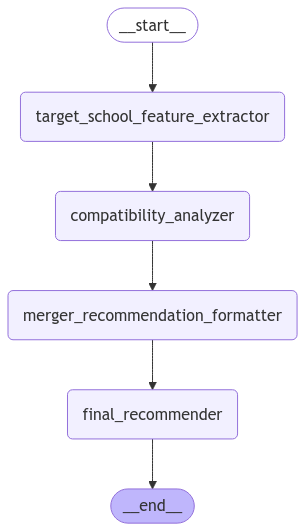

In [4]:
from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))

## 3. Run School Matcher

In [13]:
# Run the graph with a sample university
school_name = "Seattle University"
result = run_school_matcher(graph, school_name)

# Display the result
print("\nFeatures Extracted:")
print(result["features"])

for analysis in result["compatibility_analyses"]:
    print(f"\nSchool: {analysis.school}")
    print(f"Location: {analysis.location}")
    print(f"Analysis: {analysis.analysis}")
    print(f"Similarity Score: {analysis.similarity_score}")

print("\nFinal Recommendation:")
print(result["final_recommendation"])


Features Extracted:
1. Financial:
   - Type: Private institution
   - Size/scope: Medium-sized university with a focus on undergraduate and graduate programs
   - Key revenue programs: Business, Law, Nursing, Education

2. Academic:
   - Programs: Offers a wide range of undergraduate and graduate programs in various fields
   - Degrees: Offers bachelor's, master's, and doctoral degrees
   - Unique offerings: Strong emphasis on social justice and community engagement, Jesuit education

3. Market:
   - Location: Located in Seattle, Washington
   - Demographics: Diverse student population with a mix of local and international students
   - Online capabilities: Offers online and hybrid programs to cater to a wider range of students

4. Culture:
   - Mission: Committed to educating the whole person, professional formation, and empowering leaders for a just and humane world
   - Values: Emphasizes social justice, diversity, and service to others
   - History: Founded in 1891, rooted in Jesu